## 업종 목적지별 배달 주문 현황 분석
* 데이터셋: [업종 목적지별 배달 주문건수](https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=KGUDSTNORDER)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv('KGU_3rd_ORIGIN_KGUDSTNORDER_20210101000000.csv')
col_names = ['DE', 'HRLY_TIME', 'DLVR_STORE_INDUTY_NM', 'DLVR_DSTN_BRTC_NM', 'DLVR_DSTN_SIGNGU_NM', 'OREDER_CASCNT']
data.columns = col_names
data

,DE,HRLY_TIME,DLVR_STORE_INDUTY_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,OREDER_CASCNT
0,2021-01-01,0,돈까스/일식,경기도,부천시,49
1,2021-01-01,0,돈까스/일식,경기도,안산시 상록구,5
2,2021-01-01,0,돈까스/일식,경기도,의정부시,6
3,2021-01-01,0,돈까스/일식,경상남도,진주시,3
4,2021-01-01,0,돈까스/일식,경상북도,칠곡군,2
...,...,...,...,...,...,...
1026040,2021-07-31,23,한식,제주특별자치도,서귀포시,1
1026041,2021-07-31,23,한식,충청남도,천안시 서북구,2
1026042,2021-07-31,23,회,경기도,이천시,2
1026043,2021-07-31,23,회,전라남도,광양시,2


### 컬럼 설명
* HRLY_TIME:  주문시간대
* DLVR_STORE_INDUTY_NM:  메뉴 카테고리
* DLVR_DSTN_BRTC_NM:  시/도
* DLVR_DSTN_SIGNGU_NM:  시/군/구
* OREDER_CASCNT:  주문건수

In [3]:
data.isnull().sum()

DE                      0
HRLY_TIME               0
DLVR_STORE_INDUTY_NM    0
DLVR_DSTN_BRTC_NM       0
DLVR_DSTN_SIGNGU_NM     0
OREDER_CASCNT           0
dtype: int64

In [14]:
industry_delivery_totals = data.groupby('DLVR_STORE_INDUTY_NM')['OREDER_CASCNT'].sum().sort_values(ascending=False)
industry_delivery_totals.values

array([1321581, 1047851,  815165,  745818,  601403,  424633,  316226,
        301537,  298491,  270911,  261409,  118628,  105746,   99633,
         73092,   24627], dtype=int64)

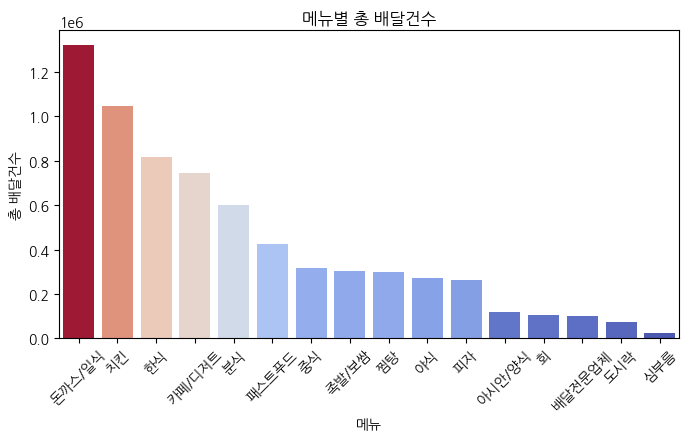

In [21]:
industry_delivery_totals = data.groupby('DLVR_STORE_INDUTY_NM')['OREDER_CASCNT'].sum().sort_values(ascending=False)

normalized_data = (industry_delivery_totals - industry_delivery_totals.min()) / (industry_delivery_totals.max() - industry_delivery_totals.min())
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_data)

# Plotting the bar graph
plt.figure(figsize=(8, 4))
# industry_delivery_totals.plot.bar(x=industry_delivery_totals.index, y=industry_delivery_totals.values, rot=0)
sns.barplot(x=industry_delivery_totals.index, y=industry_delivery_totals.values, palette=colors)
plt.title('메뉴별 총 배달건수')
plt.xlabel('메뉴')
plt.ylabel('총 배달건수')
plt.xticks(rotation=45)
plt.show()


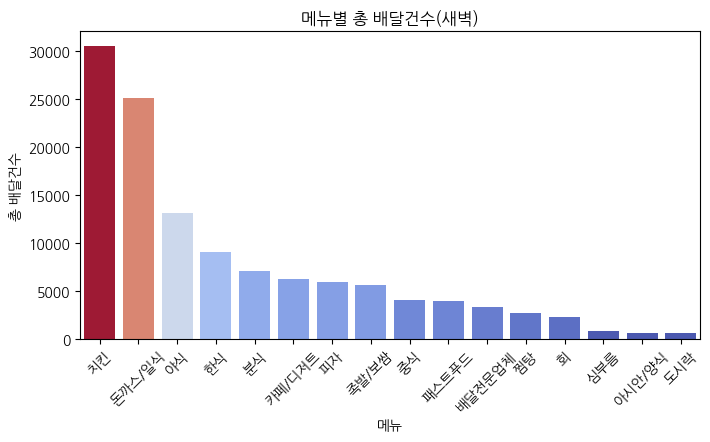

In [55]:
filtered_data = data[(data['HRLY_TIME'] >= 0) & (data['HRLY_TIME'] < 2)]
industry_delivery_totals = filtered_data.groupby('DLVR_STORE_INDUTY_NM')['OREDER_CASCNT'].sum().sort_values(ascending=False)

normalized_data = (industry_delivery_totals - industry_delivery_totals.min()) / (industry_delivery_totals.max() - industry_delivery_totals.min())
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_data)

# Plotting the bar graph
plt.figure(figsize=(8, 4))
# industry_delivery_totals.plot.bar(x=industry_delivery_totals.index, y=industry_delivery_totals.values, rot=0)
sns.barplot(x=industry_delivery_totals.index, y=industry_delivery_totals.values, palette=colors)
plt.title('메뉴별 총 배달건수(새벽)')
plt.xlabel('메뉴')
plt.ylabel('총 배달건수')
plt.xticks(rotation=45)
plt.show()


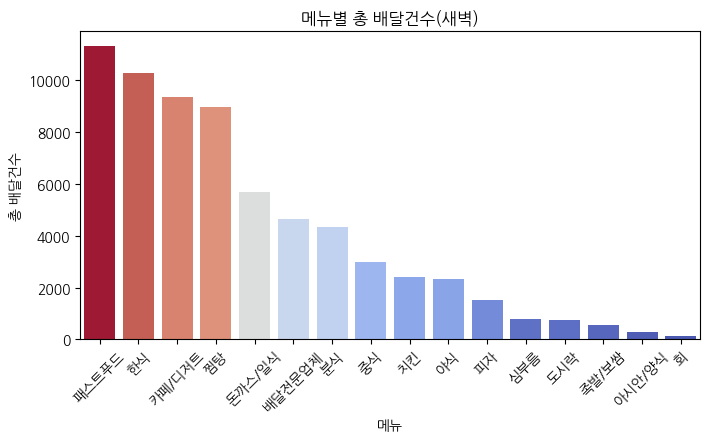

In [54]:
filtered_data = data[(data['HRLY_TIME'] >= 3) & (data['HRLY_TIME'] < 10)]
industry_delivery_totals = filtered_data.groupby('DLVR_STORE_INDUTY_NM')['OREDER_CASCNT'].sum().sort_values(ascending=False)

normalized_data = (industry_delivery_totals - industry_delivery_totals.min()) / (industry_delivery_totals.max() - industry_delivery_totals.min())
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_data)

# Plotting the bar graph
plt.figure(figsize=(8, 4))
# industry_delivery_totals.plot.bar(x=industry_delivery_totals.index, y=industry_delivery_totals.values, rot=0)
sns.barplot(x=industry_delivery_totals.index, y=industry_delivery_totals.values, palette=colors)
plt.title('메뉴별 총 배달건수(새벽)')
plt.xlabel('메뉴')
plt.ylabel('총 배달건수')
plt.xticks(rotation=45)
plt.show()


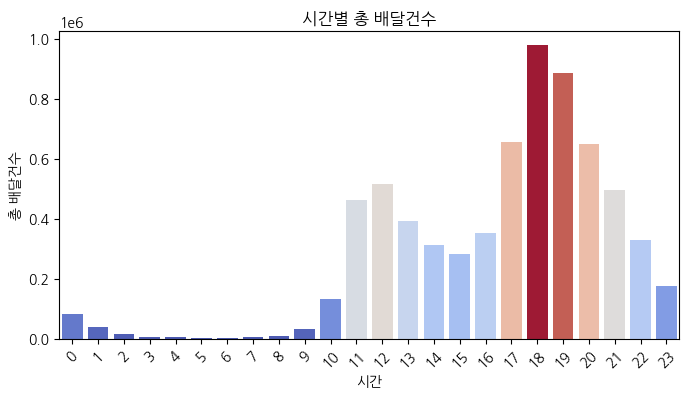

In [22]:
time_zone_deliveries  = data.groupby('HRLY_TIME')['OREDER_CASCNT'].sum()

normalized_data = (time_zone_deliveries - time_zone_deliveries.min()) / (time_zone_deliveries.max() - time_zone_deliveries.min())
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_data)

plt.figure(figsize=(8, 4))
sns.barplot(x=time_zone_deliveries.index, y=time_zone_deliveries.values, palette=colors)
plt.title('시간별 총 배달건수')
plt.xlabel('시간')
plt.ylabel('총 배달건수')
plt.xticks(rotation=45)
plt.show()


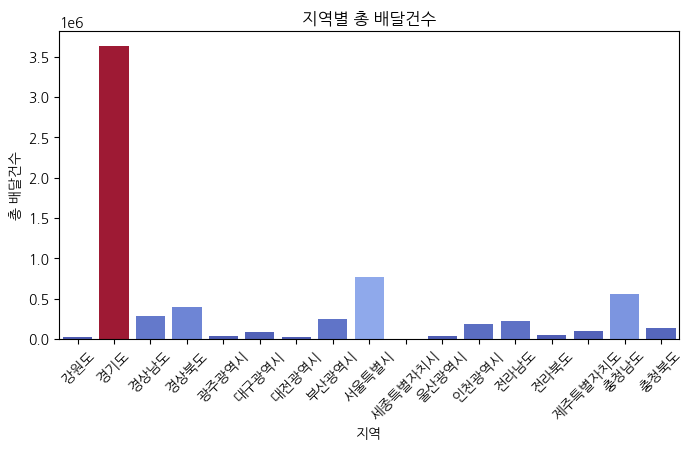

In [25]:
location_zone_deliveries  = data.groupby('DLVR_DSTN_BRTC_NM')['OREDER_CASCNT'].sum()

normalized_data = (location_zone_deliveries - location_zone_deliveries.min()) / (location_zone_deliveries.max() - location_zone_deliveries.min())
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_data)

plt.figure(figsize=(8, 4))
sns.barplot(x=location_zone_deliveries.index, y=location_zone_deliveries.values, palette=colors)
plt.title('지역별 총 배달건수')
plt.xlabel('지역')
plt.ylabel('총 배달건수')
plt.xticks(rotation=45)
plt.show()


In [7]:
# datetime 포맷인지 확인
data['DE'] = pd.to_datetime(data['DE'])

# DE 컬럼의 데이터에서 월만 추출해서 Month 컬럼 생성
data['Month'] = data['DE'].dt.month

data.columns

Index(['DE', 'HRLY_TIME', 'DLVR_STORE_INDUTY_NM', 'DLVR_DSTN_BRTC_NM',
       'DLVR_DSTN_SIGNGU_NM', 'OREDER_CASCNT', 'Month'],
      dtype='object')

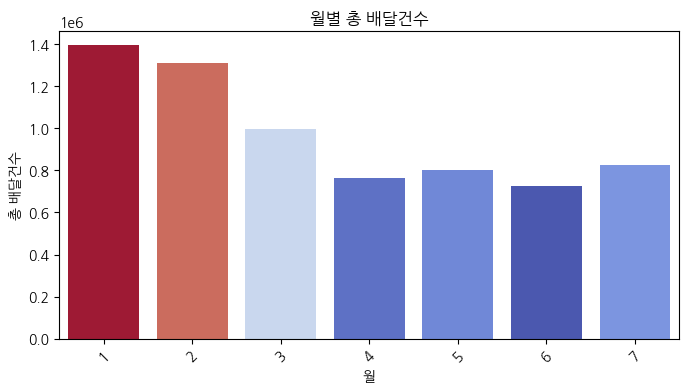

In [8]:
monthly_deliveries = data.groupby('Month')['OREDER_CASCNT'].sum()

normalized_data = (monthly_deliveries - monthly_deliveries.min()) / (monthly_deliveries.max() - monthly_deliveries.min())
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_data)

# Plotting the number of deliveries per month
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_deliveries.index, y=monthly_deliveries.values, palette=colors)
plt.title('월별 총 배달건수')
plt.xlabel('월')
plt.ylabel('총 배달건수')
plt.xticks(rotation=45)
plt.show()